In [1]:
%reload_ext autoreload
%autoreload 2import 
%matplotlib inline

In [2]:
from fastai import *
from fastai.vision import *
from fastai.metrics import error_rate

In [3]:
np.random.seed(42)

path = Path('data/imgs/train')
path.ls()

[PosixPath('data/imgs/train/c2'),
 PosixPath('data/imgs/train/c6'),
 PosixPath('data/imgs/train/c4'),
 PosixPath('data/imgs/train/c0'),
 PosixPath('data/imgs/train/c5'),
 PosixPath('data/imgs/train/c3'),
 PosixPath('data/imgs/train/c1'),
 PosixPath('data/imgs/train/c8'),
 PosixPath('data/imgs/train/c7'),
 PosixPath('data/imgs/train/c9')]

In [4]:
bs = 64
data = ImageDataBunch.from_folder(path, train='.', test='../test', valid_pct=0.2,
        ds_tfms=get_transforms(), size=224, bs=bs, num_workers=4).normalize(imagenet_stats)

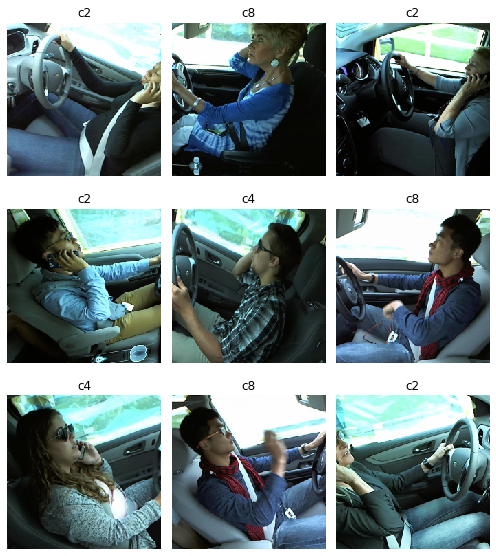

In [5]:
data.show_batch(rows=3, figsize=(7,8))

In [6]:
data.classes, data.c, len(data.train_ds), len(data.valid_ds)

(['c0', 'c1', 'c2', 'c3', 'c4', 'c5', 'c6', 'c7', 'c8', 'c9'], 10, 17940, 4484)

In [7]:
learn = cnn_learner(data, models.resnet50, metrics=[accuracy, FBeta(average='macro')])

In [8]:
learn.fit_one_cycle(5)

epoch,train_loss,valid_loss,accuracy,f_beta,time
0,0.739637,0.231288,0.927074,0.923821,02:47
1,0.311450,0.116480,0.962979,0.961166,02:45
2,0.188960,0.058477,0.984166,0.983325,02:44
3,0.123940,0.038552,0.989072,0.988275,02:43
4,0.092118,0.031487,0.990856,0.990243,02:43


In [9]:
learn.save('stage-1')

In [10]:
learn.unfreeze()

In [11]:
learn.lr_find()

epoch,train_loss,valid_loss,accuracy,f_beta,time


LR Finder is complete, type {learner_name}.recorder.plot() to see the graph.


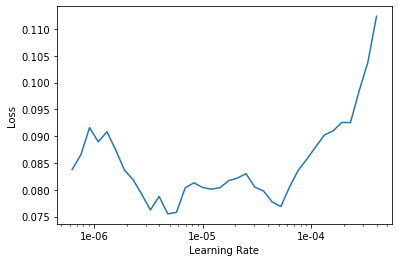

In [12]:
learn.recorder.plot()

In [13]:
learn.fit_one_cycle(5, max_lr=slice(1e-6, 1e-4))

epoch,train_loss,valid_loss,accuracy,f_beta,time
0,0.070994,0.027921,0.993087,0.992714,02:45
1,0.061558,0.022395,0.993533,0.993015,02:46
2,0.043926,0.014758,0.995317,0.994949,02:45
3,0.032469,0.013061,0.995763,0.995562,02:47
4,0.031008,0.012572,0.996432,0.996290,02:48


In [14]:
learn.save('stage-2')

In [15]:
learn.lr_find()

epoch,train_loss,valid_loss,accuracy,f_beta,time


LR Finder is complete, type {learner_name}.recorder.plot() to see the graph.


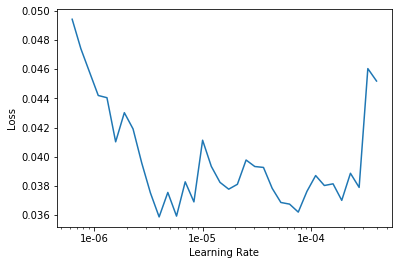

In [16]:
learn.recorder.plot()

In [17]:
learn.fit_one_cycle(5, max_lr=slice(1e-6, 1e-4))

epoch,train_loss,valid_loss,accuracy,f_beta,time
0,0.026539,0.011818,0.997324,0.997312,02:47
1,0.026096,0.012116,0.996432,0.996396,02:47
2,0.022166,0.010623,0.996878,0.996742,02:46
3,0.017608,0.009433,0.997547,0.997453,02:46
4,0.016585,0.008838,0.997770,0.997695,02:47


In [18]:
learn.save('stage-3')

In [19]:
learn.export()